In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import copy

In [55]:
rawdata = pd.read_csv("최종리스트.csv",engine="python",encoding = "cp949",names=["text","target"],skiprows=1)

In [56]:
rawdata.head()

,text,target
0,살아남기 방송안무 너구리 신나는 짜장라면 간식거리 두통약 자취생활 거울 칼로리 길...,기네스
1,팔로우좋아요 길거리 자취녀 기네스 좋아유 장거리 갑분싸 공연 데일리룩 만취 새옷 ...,기네스
2,저녁밥상 칼로리 산책냥 느끼 자취녀 기네스 예술가 방송 갑분싸 공연 데일리룩 만취...,기네스
3,인터넷블랙잭 바카라 카지노 온라인카지노 모바일카지노 바카라 룰렛 블랙...,기네스
4,마이 춥네 히터랑나랑 김언니와 함께,기네스


In [57]:
rawdata = copy.copy(rawdata[rawdata["target"] != "필라이트"])

In [58]:
#원본 데이터셋의 리뷰 수

len(rawdata["text"])

26768

In [59]:
rawdata = rawdata[rawdata["text"].duplicated() != True]

In [60]:
len(np.where(rawdata["text"].duplicated() == True)[0])

0

In [61]:
rawdata = rawdata.dropna()

In [62]:
rawdata["text"].head()

0     살아남기 방송안무 너구리 신나는 짜장라면 간식거리 두통약 자취생활 거울 칼로리 길...
1     팔로우좋아요 길거리 자취녀 기네스 좋아유 장거리 갑분싸 공연 데일리룩 만취 새옷 ...
2     저녁밥상 칼로리 산책냥 느끼 자취녀 기네스 예술가 방송 갑분싸 공연 데일리룩 만취...
3     인터넷블랙잭  바카라  카지노  온라인카지노  모바일카지노  바카라  룰렛  블랙...
4                                  마이 춥네 히터랑나랑 김언니와 함께
Name: text, dtype: object

In [63]:
target = rawdata["target"]

In [64]:
text = rawdata["text"]

In [65]:
len(target)

24574

In [66]:
len(text)

24574

In [67]:
from konlpy.tag import Okt
twitter_tag = Okt()

def vect_tokenizer(text):
    return twitter_tag.nouns(text)

In [68]:
vect = CountVectorizer(tokenizer = vect_tokenizer ,min_df = 10, analyzer = "word")

In [69]:
vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function vect_tokenizer at 0x0000014017A0CE18>,
        vocabulary=None)

In [71]:
names = re.compile("[맥주]+")

for i,j in target.items():
    if j.endswith("맥주"):
        target[i] = names.sub("",j)
    else : pass

In [72]:
#타겟변수의 색인 사전 존재여부 확인

for i in target.unique():
    try:
        print(i,vect.vocabulary_[i])
    except : 
        print(i,"없음")

기네스 509
칼스버그 4546
코젤 4622
호가든 5328
버드와이저 1950
산미구엘 2324
삿포로 2364
아사히 2984
칭따오 4509
카스 4525
필스너 5118
하이네켄 5151
하이트 5155


In [73]:
morph = list()

for i in text:
    raw = twitter_tag.nouns(i)
    #raw = [raw[k] for k in np.where([len(j) != 1 for j in raw])[0]]
    morph.append(raw)

In [74]:
vectorized = list()


for k in morph:
    raw = list()
    for i in k:
        try:
            raw.append(vect.vocabulary_[i])
        except :
            raw.append(0)
    vectorized.append(raw)

In [394]:
DataFrame(vectorized).to_csv("벡터화.csv")

In [75]:
len(vectorized)

24574

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_encoded = le.fit_transform(target)

In [77]:
target_encoded

array([ 0,  0,  0, ..., 11, 11, 11])

In [78]:
len(target_encoded)

24574

In [395]:
DataFrame(target_encoded).to_csv("타겟.csv")

In [79]:
a = 0
b = 0

for i in range(0,len(vectorized)):
    a += len(vectorized[i])

mu = a/len(vectorized)

for i in range(0, len(vectorized)):
    b += (len(vectorized[i]) - mu)**2

std_dev = (b/len(vectorized))**0.5

In [82]:
print(mu,std_dev)

25.25665337348417 21.40420702626632


In [83]:
vectorized_seq = sequence.pad_sequences(vectorized,maxlen=50)

In [84]:
vectorized_seq

array([[   0,    0,    0, ...,  555,  509, 3438],
       [   0,    0,    0, ..., 3741, 3741, 2929],
       [   0,    0,    0, ..., 3778, 1298, 2837],
       ...,
       [   0,    0,    0, ..., 3194, 2560, 4068],
       [   0,    0,    0, ..., 3225, 3634, 2626],
       [   0,    0,    0, ..., 1007,  700, 4996]])

In [85]:
X_train,X_test,y_train,y_test = train_test_split(vectorized_seq, target_encoded)

In [86]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [87]:
model = Sequential()
model.add(Embedding(len(vectorized_seq),128,input_length = 50))
model.add(Dropout(0.2))
model.add(Conv1D(256,3,padding="valid",activation="relu",strides=1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(128))
model.add(Dense(13,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [88]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

%matplotlib inline

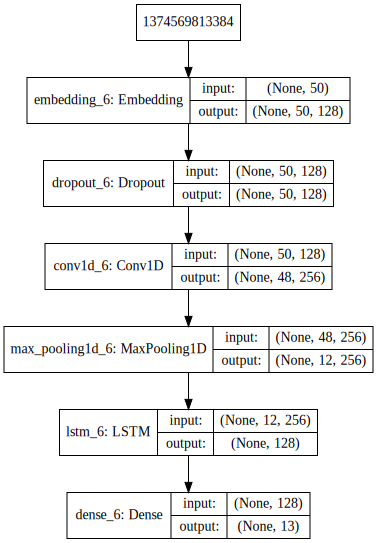

In [89]:
SVG(model_to_dot(model,show_shapes=True).create(prog = "dot",format="svg"))

In [133]:
hist = model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_test,y_test))

Train on 18430 samples, validate on 6144 samples
Epoch 1/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.1774 - acc: 0.9440 - val_loss: 0.3706 - val_acc: 0.8939
Epoch 2/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.1321 - acc: 0.9577 - val_loss: 0.4163 - val_acc: 0.8896
Epoch 3/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.1031 - acc: 0.9685 - val_loss: 0.4326 - val_acc: 0.8953
Epoch 4/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.0836 - acc: 0.9743 - val_loss: 0.5029 - val_acc: 0.8854
Epoch 5/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.0761 - acc: 0.9770 - val_loss: 0.4899 - val_acc: 0.8952
Epoch 6/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.0689 - acc: 0.9781 - val_loss: 0.5507 - val_acc: 0.8877
Epoch 7/50
18430/18430 [==============================] - 21s 1ms/step - loss: 0.0610 - acc: 0.9816 - val_loss: 0.5646 - val_acc:

In [140]:
model.save("chatbot.model")

In [157]:
model.layers[0].get_weights()[0]

array([[ 5.56584708e-02, -1.16541823e-02, -1.35325352e-02, ...,
        -1.69606637e-02,  1.17424436e-01,  4.12696898e-02],
       [-4.68317680e-02,  4.87484150e-02,  3.50844190e-02, ...,
         1.74743265e-01,  1.85512096e-01,  1.81384925e-02],
       [ 1.50536925e-01,  1.24545567e-01, -1.92968532e-01, ...,
         1.01446800e-01,  6.89871609e-02,  3.61805484e-02],
       ...,
       [-2.26365086e-02, -4.15028445e-02, -4.75136042e-02, ...,
         1.51324272e-03, -5.94594330e-03, -3.28309834e-05],
       [ 1.50697716e-02, -3.14165838e-02,  2.25156434e-02, ...,
        -4.83597890e-02, -3.89745720e-02,  6.17524236e-03],
       [-1.97904706e-02, -7.45154545e-03,  2.06745379e-02, ...,
         3.79477479e-02,  9.31967050e-04,  6.79695606e-03]], dtype=float32)

In [113]:
good = model.predict_classes(X_train)

In [111]:
print(good[1])

print(X_train[1])

print(pd.unique(le.inverse_transform(target_encoded)))

array(['기네스', '칼스버그', '코젤', '호가든', '버드와이저', '산미구엘', '삿포로', '아사히', '칭따오',
       '카스', '필스너', '하이네켄', '하이트'], dtype=object)

In [9]:
'''
vectorized = pd.read_csv("벡터화.csv",engine="python",encoding="cp949")

vectorized = vectorized.fillna(0)
del vectorized["Unnamed: 0"]

vectorized = vectorized.values

vectorized_target = pd.read_csv("타겟.csv",engine="python",encoding="cp949")

del vectorized_target["Unnamed: 0"]

target_encoded = vectorized_target.values
'''